# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import warnings
warnings.filterwarnings('ignore')

# Necessary Functions

In [2]:
def correlation_maker(df):
    """ Make Correlaion Matrix and plot

    Args:
        df (data_frame): dataset
    """
    correlation = df.corr().round(2)
    plt.figure(figsize = (19,13))
    sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

In [3]:
def null_counter(df):
    """Counts Null In Dataframe

    Args:
        df (Data_Frame): dataset
    """
    for col in df.columns:
        print(col)
        print(df[str(col)].isnull().sum())

In [4]:
def Select_Best_Features(df,x,y,number_of_features = 10):
    """Selects K Best Feature

    Args:
        df : _dataset
        x :  training input samples
        y :  training input samples
        number_of_features (int, optional): number of K features to be selected Defaults to 10.

    Returns:
        list : column names of best feature
    """
    # find best scored 5 features
    select_feature = SelectKBest(chi2, k=number_of_features).fit(x, y)
    #print('Score list:', select_feature.scores_)
    #print('Feature list:', df.columns)
    score_list = select_feature.scores_
    column_list = df.columns.tolist()
    #print(column_list)
    #print(score_list)
    sortlist = [x for _, x in sorted(zip(score_list, column_list),reverse=True)]
    # Display list
    #print(sortlist)
    return sortlist[:number_of_features]
    #print(sortlist)

# Dataset Loading

In [5]:
data = pd.read_csv('./Dataset/data.csv')


In [6]:
display(data)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Changing Label Encoding

In [7]:
data['diagnosis'] = data['diagnosis'].replace({'M':1, 'B':0})

# Splitting Data and Label

In [8]:
#Splitting Data and Label
y = data.diagnosis# M or B 
#Removing Unnecessary Columns
listo = ['id', 'diagnosis']
x = data.drop(listo, axis=1)
print(x.columns)
#print(x.describe())

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


# Correlation Map

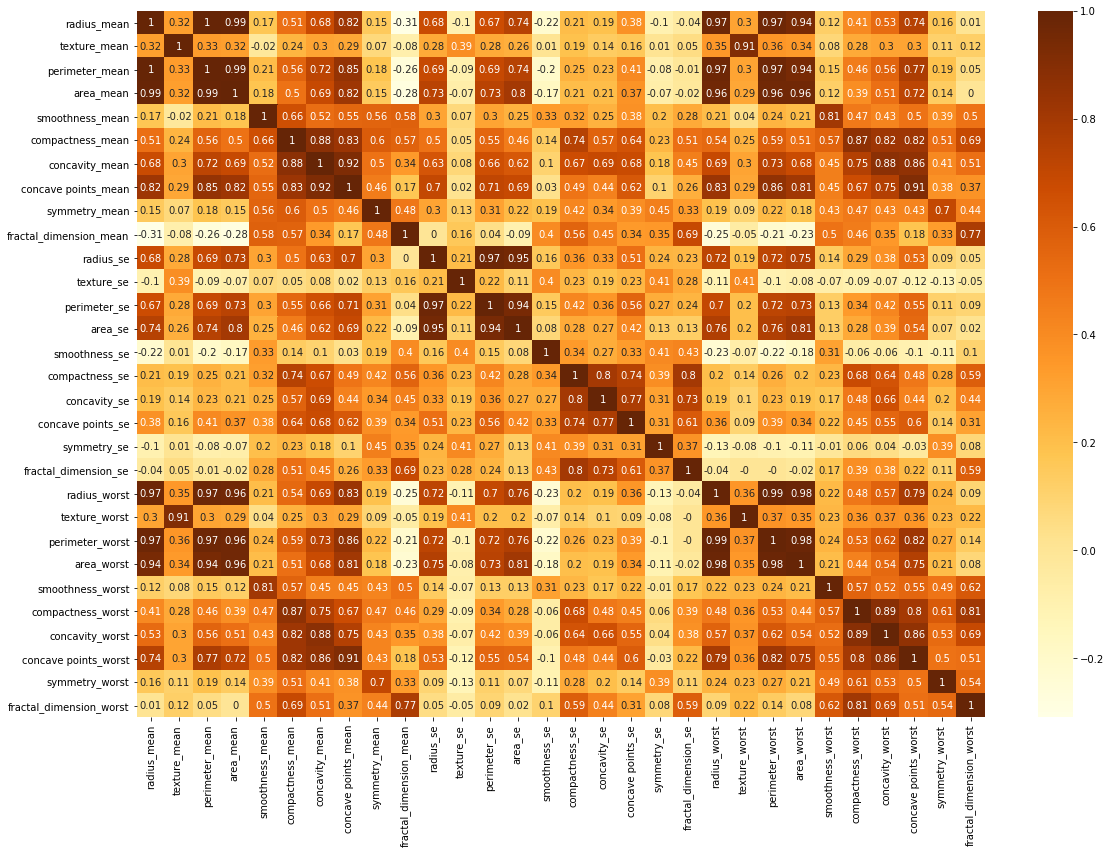

In [9]:
correlation_maker(x)

# Label Count Plot


Number of Benign:  357
Number of Malignant :  212


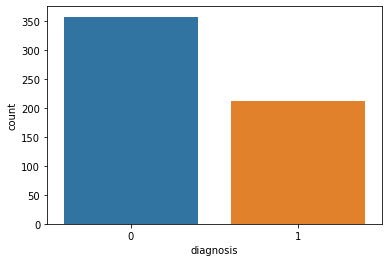

In [10]:
ax = sns.countplot(y, label="Count")       # M = 212, B = 357
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

# Standardization

In [11]:
x[x.columns.tolist()] = MinMaxScaler().fit_transform(x[x.columns.tolist()])

# KDE plot

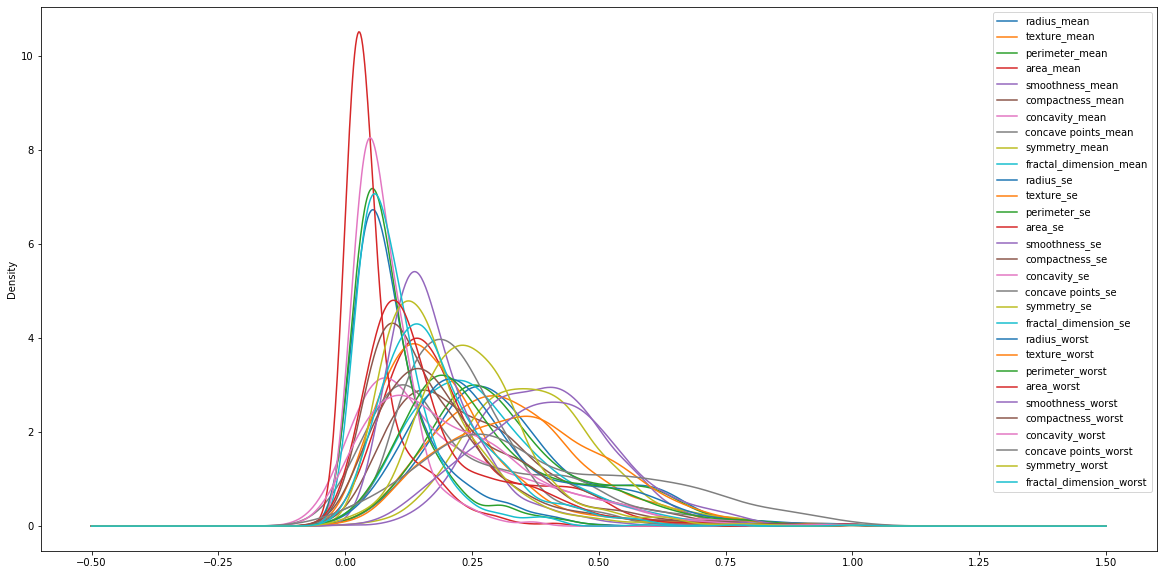

In [12]:
x.plot.kde(figsize=(20, 10))

# Box Plot

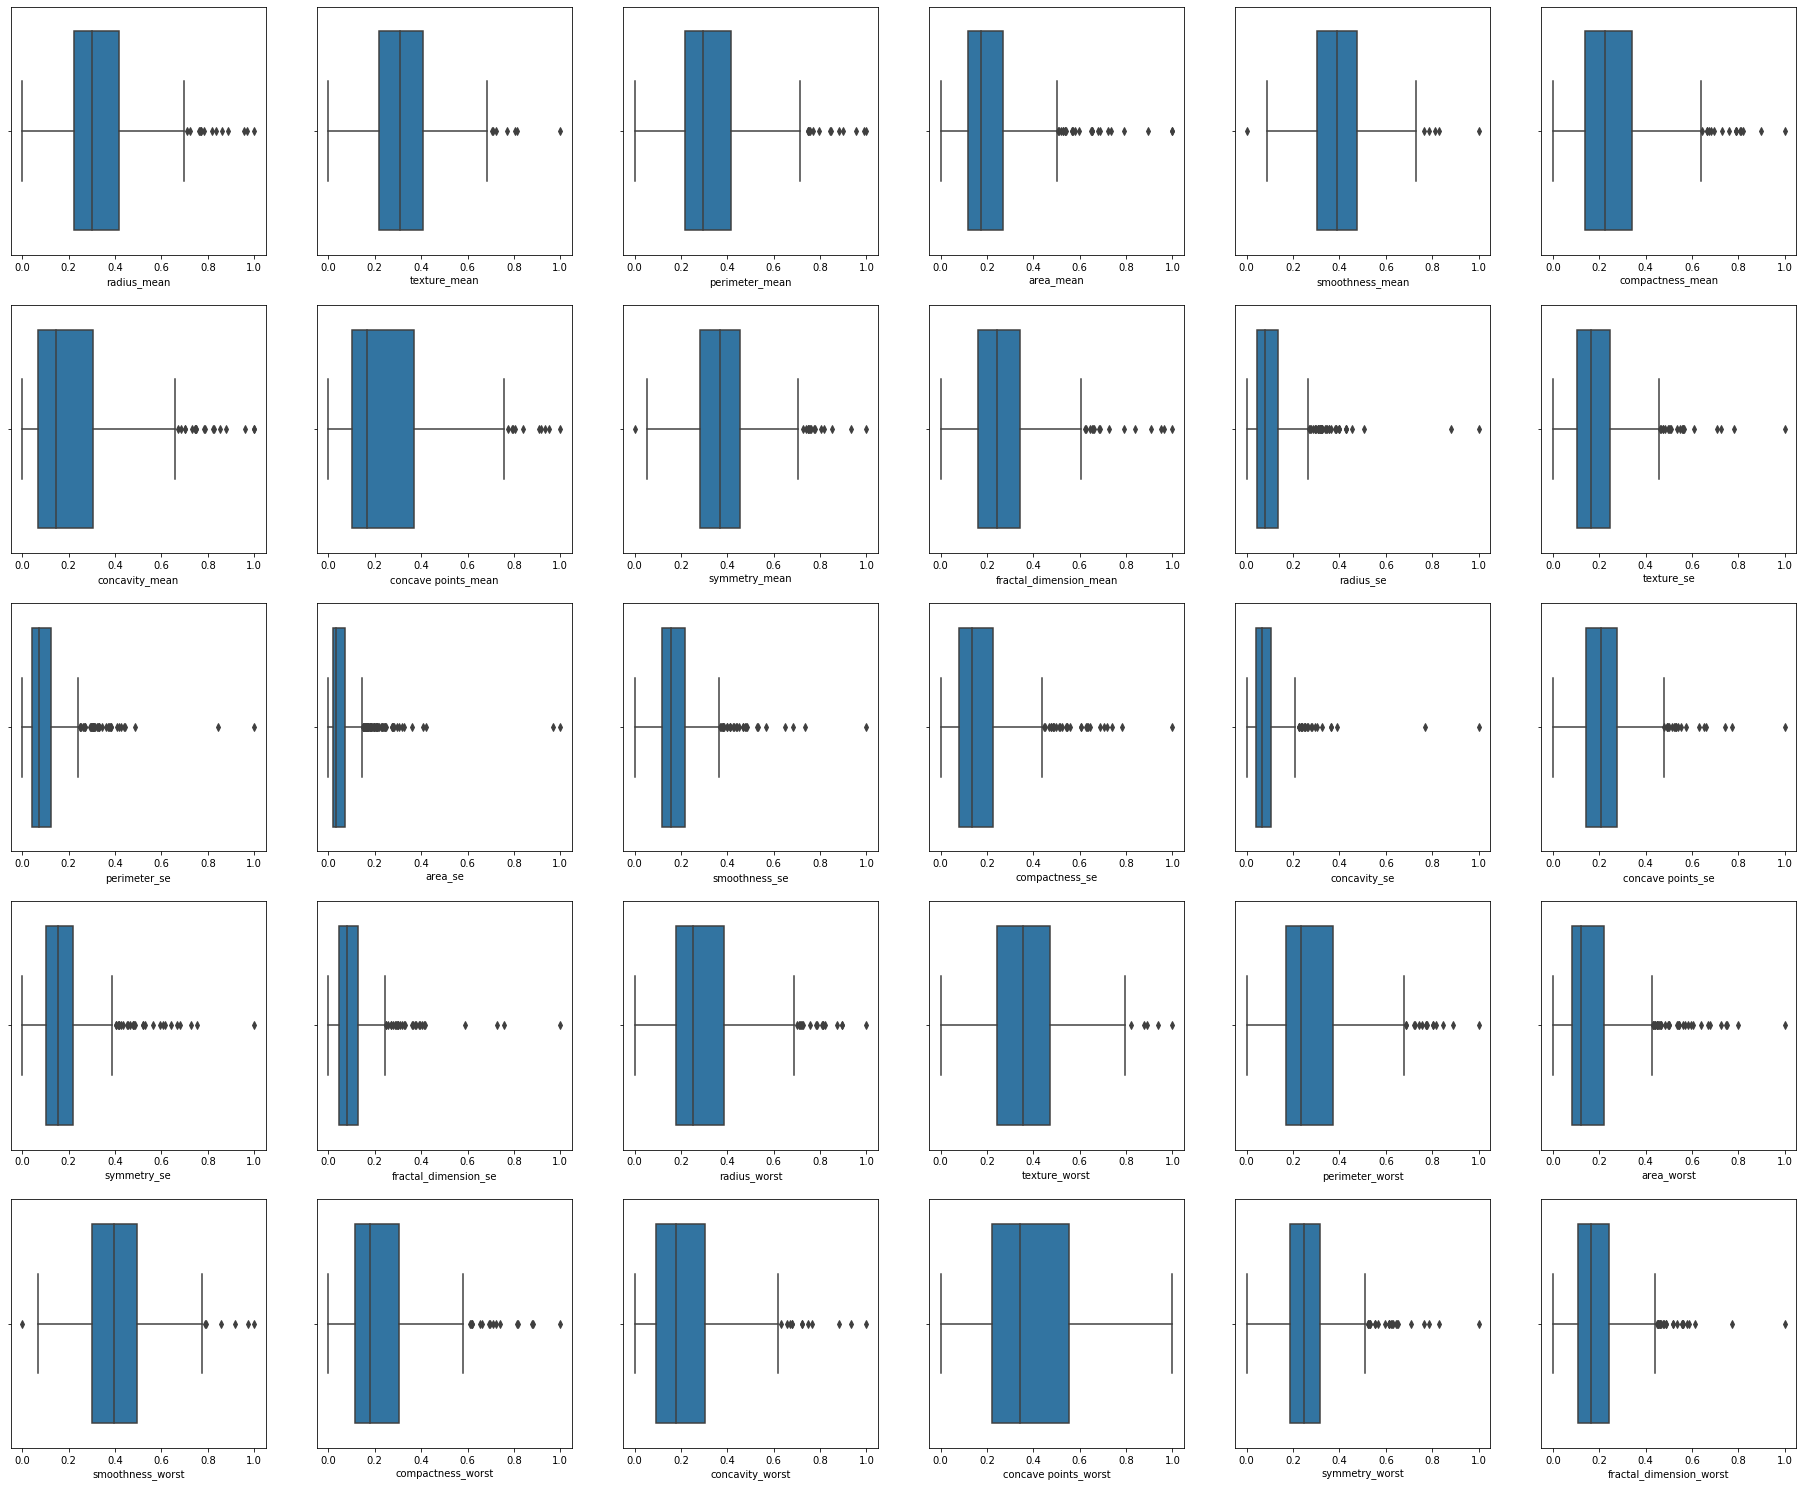

In [13]:
plt.figure(figsize=(32,32))
for i,val in enumerate(x.columns):
    plt.subplot(6, 6, i+1)
    ax = sns.boxplot(x=x[str(val)])
    #plt.subplot(1, 2, 1)
plt.show()

# Violin Plot

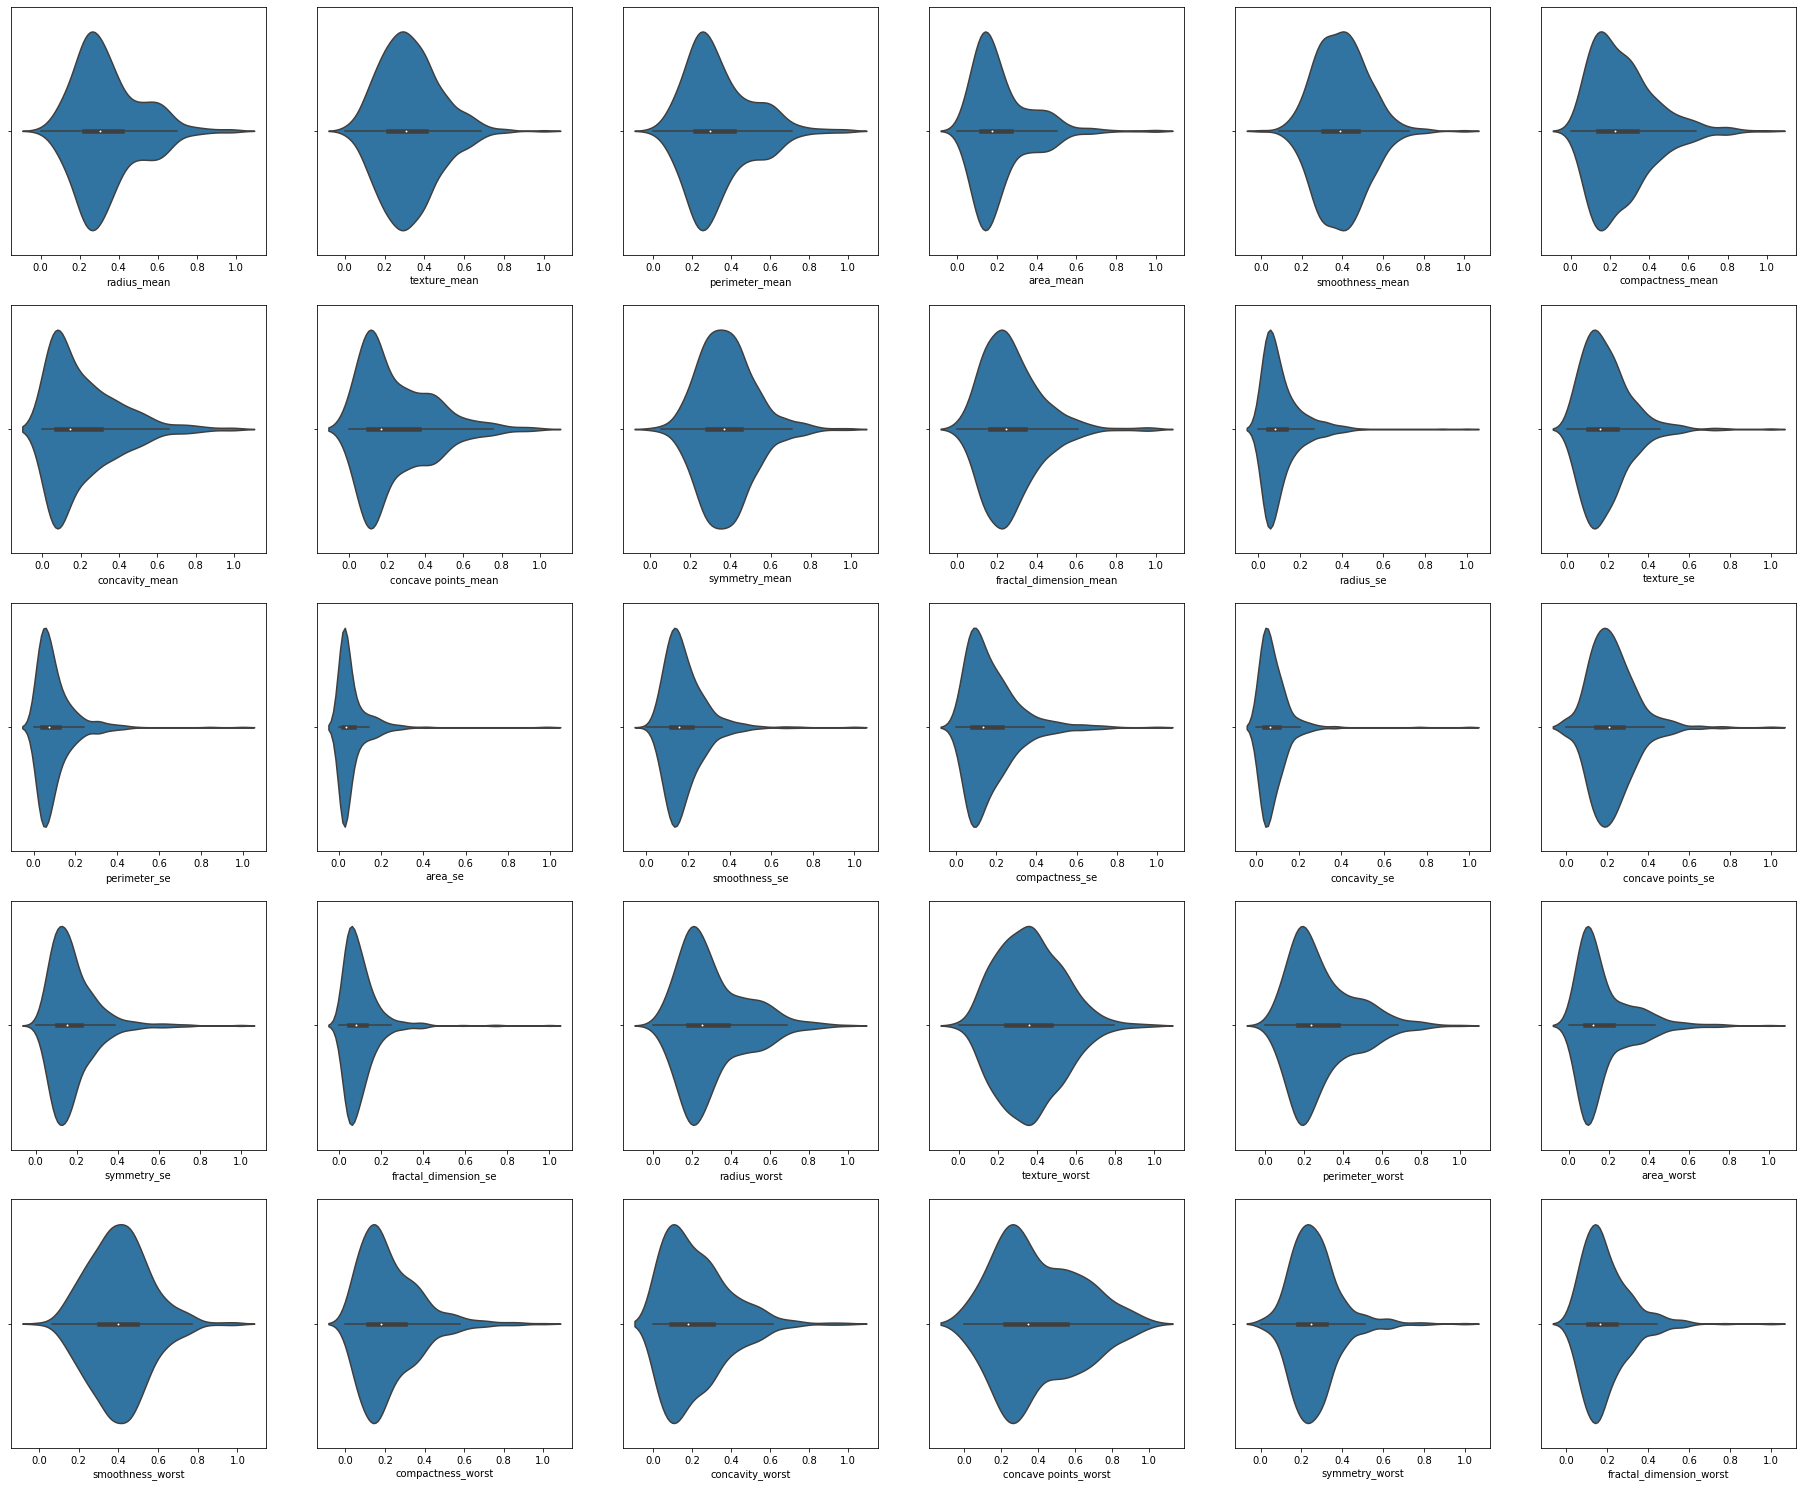

In [14]:
plt.figure(figsize=(32,32))
for i,val in enumerate(x.columns):
    plt.subplot(6, 6, i+1)
    ax = sns.violinplot(x=x[str(val)])
    #plt.subplot(1, 2, 1)
plt.show()

# Selecting K Best Features

In [15]:
best_feature_column_list = Select_Best_Features(x, x, y, 10)

In [16]:
print(best_feature_column_list)

['concave points_mean', 'concave points_worst', 'concavity_mean', 'area_worst', 'perimeter_worst', 'radius_worst', 'concavity_worst', 'area_mean', 'perimeter_mean', 'radius_mean']


In [17]:
K_best_feature_data = data[np.intersect1d(data.columns, best_feature_column_list)]
#print(K_best_feature_data)

# Grid Search and Finding Best Parameter

In [18]:
#Select Features
X = K_best_feature_data
print(X.shape)
print(y.shape)
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1", "l2"],'solver'  : ['newton-cg', 'lbfgs', 'liblinear']}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=5)
logreg_cv.fit(X,y)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

(569, 10)
(569,)
tuned hpyerparameters :(best parameters)  {'C': 100.0, 'penalty': 'l2', 'solver': 'newton-cg'}
accuracy : 0.9613569321533924


In [19]:
print(logreg_cv.best_params_['C'])
print(logreg_cv.best_params_['penalty'])
print(logreg_cv.best_params_['solver'])

100.0
l2
newton-cg


# Dataset Split on train/test

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, shuffle = True, test_size = .2, random_state = 44)
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (455, 10)
Shape of testing feature: (114, 10)
Shape of training label: (455,)
Shape of training label: (114,)


# Training with best parameter

In [21]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(C=logreg_cv.best_params_['C'],penalty=logreg_cv.best_params_['penalty'],solver=logreg_cv.best_params_['solver'],random_state=17, n_jobs=4)

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

# Evaluation

In [22]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9736842105263158
Precision: 1.0
Recall: 0.9230769230769231


# Confusion Matrix

In [23]:
cm = metrics.confusion_matrix(y_test, y_pred)

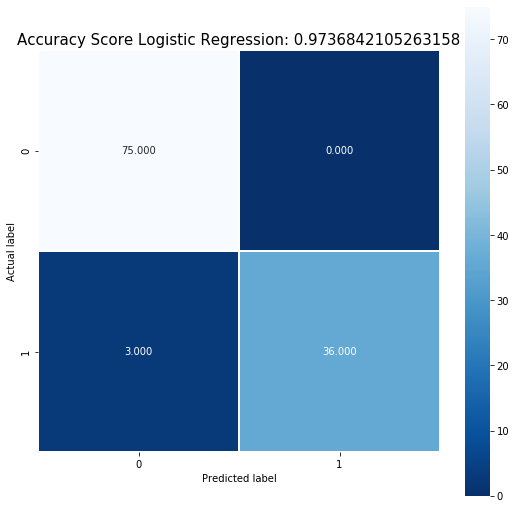

In [24]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score Logistic Regression: {0}'.format(metrics.accuracy_score(y_test, y_pred))
plt.title(all_sample_title, size = 15);

# Classification Report

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        75
           1       1.00      0.92      0.96        39

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114

